## Présentation du projet – Modélisation du risque de crédit

La modélisation du risque de crédit constitue l'un des piliers fondamentaux des accords de Bâle et de la gestion globale des risques financiers. Elle vise à évaluer et à maîtriser le risque de non-respect des engagements de remboursement par les emprunteurs.


L'objectif principal de cette modélisation est d'estimer l'encours exposé au risque et de déterminer le niveau de couverture nécessaire pour permettre aux institutions financières de sécuriser leur portefeuille de crédits.

Ce processus repose sur plusieurs étapes clés, dont la plus cruciale est la détermination de la probabilité de défaut (PD) de l'emprunteur. Cette évaluation est ensuite combinée à la perte en cas de défaut (LGD) et à l’exposition au moment du défaut (EAD) pour calculer la perte attendue sur les portefeuilles de crédits.

Ces paramètres sont également essentiels dans le cadre du calcul des provisions selon les normes IFRS9, intégrant la dimension prospective (« forward-looking ») pour anticiper les dégradations économiques futures.

Ainsi, la modélisation du risque de crédit permet non seulement d'estimer les pertes potentielles mais aussi de renforcer la solidité financière des établissements en assurant une couverture adéquate des risques liés au crédit.

Ainsi, nous allons déployer les différentes étapes de la modélisation du risque de crédit. Une fois le modèle établi et les prévisions de probabilités de défaut (PD) réalisées, nous procéderons au calcul des principales métriques de risque : la perte attendue (Expected Loss - EL), la perte attendue comptable selon les normes IFRS9 (Expected Credit Loss - ECL) ainsi que la Value at Risk (VaR).

In [ ]:
# import des differents libraires pour le projets : 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn  

! pip install imbalanced-learn 
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import sklearn.model_selection
from sklearn.metrics import roc_curve, auc


In [2]:
# import de données  : 

df = pd.read_csv("/workspaces/credit-risk-/data.csv")

In [3]:
# liste des differentes variables 

df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
# presentation 

df.sample(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
8755,23,37440,RENT,8.0,EDUCATION,E,8000,14.18,0,0.21,N,2
12392,22,80070,MORTGAGE,6.0,EDUCATION,B,27525,10.74,0,0.34,N,3
12259,25,80000,MORTGAGE,5.0,EDUCATION,B,25000,10.36,0,0.31,N,3
8015,23,55000,MORTGAGE,2.0,EDUCATION,A,7000,8.59,0,0.13,N,2
23917,34,26000,RENT,2.0,VENTURE,B,10000,12.42,1,0.38,N,7
24853,27,102000,RENT,2.0,HOMEIMPROVEMENT,A,10150,NaN,0,0.10,N,6
30201,36,49000,OWN,NaN,PERSONAL,D,4200,16.02,0,0.09,Y,13
30042,36,26000,RENT,NaN,DEBTCONSOLIDATION,B,8500,10.62,1,0.33,N,14
24611,29,63000,RENT,13.0,MEDICAL,A,10000,7.49,0,0.16,N,8
30849,37,24000,RENT,5.0,DEBTCONSOLIDATION,B,10000,9.76,1,0.42,N,13


In [ ]:
# presentation 
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
# presentation 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## Description des différentes variavles : 


Le jeu de données comporte 12 variables et 32 581 observations, chacune représentant une personne ayant contracté un prêt. Les variables se divisent en deux catégories : celles qui décrivent les caractéristiques du prêt (montant, taux d’intérêt, statut, etc.) et celles qui décrivent le profil de l’emprunteur (âge, revenu, situation professionnelle, etc.).

L’objectif est d’utiliser ces données historiques pour construire un modèle de scoring capable de prédire la probabilité de défaut pour de nouveaux candidats à un crédit.
Avant d’entamer la modélisation, il est essentiel de bien comprendre les variables à notre disposition :

**person_age** : âge de l’emprunteur ;

**person_income** : revenu annuel (ou salaire) de l’emprunteur ;

**person_home_ownership** : statut de logement (propriétaire, locataire, etc.) ;


**person_emp_length** : ancienneté professionnelle (en mois) ;


**loan_intent** : objet ou finalité du crédit (voiture, éducation, etc.) ;


**loan_grade** : notation de la solvabilité, de A (meilleure) à G (plus risquée) ;


**loan_amnt** : montant total du prêt ;


**loan_int_rate** : taux d’intérêt appliqué au prêt ;


**loan_status** : variable cible, indiquant un défaut de paiement (1) ou non (0) ;


**loan_percent_income** : part du crédit par rapport au revenu (ratio dette/revenu) ;


**cb_person_default_on_file** : défaut de paiement passé enregistré ou non ;


**cb_person_cred_hist_length** : durée de l’historique de crédit.


Nous allons maintenant passer à l’analyse exploratoire des données (EDA) afin de mieux comprendre la structure du dataset, détecter les éventuelles anomalies et identifier les relations clés entre les variables.

loan_status
0    0.781836
1    0.218164
Name: proportion, dtype: float64


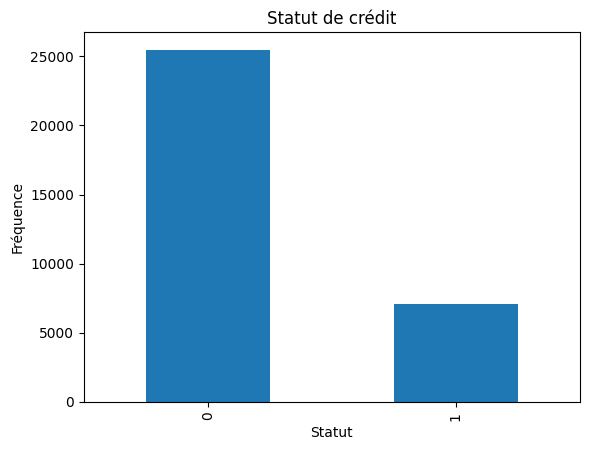

In [ ]:
# Transformation de la variable cible en variable catégorielle

df['loan_status'] = df['loan_status'].astype('category')

# Table de fréquence de la variable cible ('loan_status')
freq_table = df['loan_status'].value_counts(normalize=True)
print(freq_table)

# Diagramme à barres de la variable 'loan_status'
df['loan_status'].value_counts().plot(kind='bar')
plt.title("Statut de crédit")
plt.xlabel("Statut")
plt.ylabel("Fréquence")
plt.show()

Comme on peut le constater, nos données présentent un déséquilibre important entre les classes : environ 78 % des observations correspondent à des cas de non-défaut, contre 22 % de défauts. Ce type de déséquilibre est fréquent dans les jeux de données liés au crédit. En effet, la majorité des emprunteurs ont tout intérêt à honorer leurs engagements : un remboursement régulier améliore leur cote de crédit, ce qui leur permet ensuite d’accéder plus facilement à de nouveaux financements pour d'autres projets.


Si ce déséquilibre est cohérent avec la réalité du domaine, il constitue néanmoins un véritable défi pour les algorithmes de classification en Machine Learning. Une mauvaise prise en compte de cette distribution peut conduire à des modèles biaisés, favorisant excessivement la classe majoritaire.


Il sera donc essentiel, lors de la phase de préparation des données à la modélisation, de mettre en œuvre des techniques permettant de corriger ce déséquilibre afin d’assurer des performances équilibrées sur les deux classes.

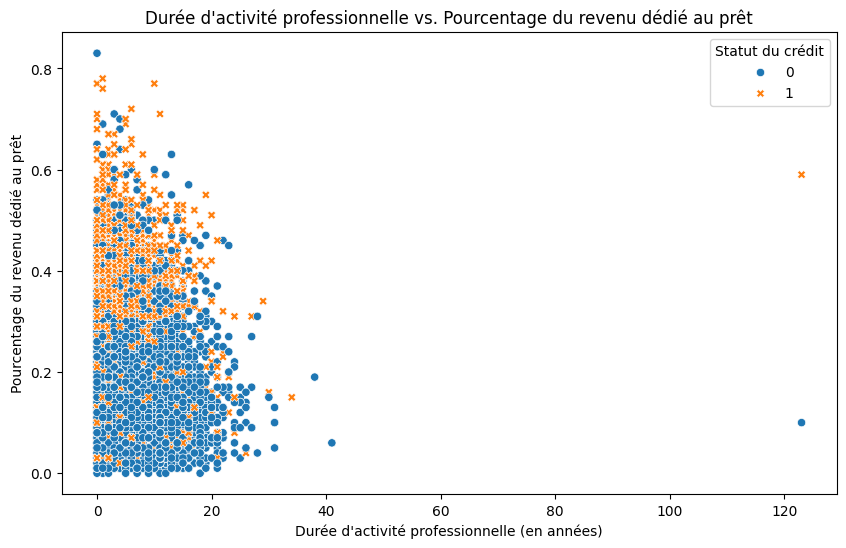

In [ ]:
# Nuage de points avec couleur et forme selon 'loan_status'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, 
                x='person_emp_length', 
                y='loan_percent_income',
                hue='loan_status', 
                style='loan_status')

plt.title("Durée d'activité professionnelle vs. Pourcentage du revenu dédié au prêt")
plt.xlabel("Durée d'activité professionnelle (en années)")
plt.ylabel("Pourcentage du revenu dédié au prêt")
plt.legend(title="Statut du crédit")
plt.show()

/tmp/ipykernel_2307/3007913521.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y='loan_percent_income', palette='Set2')


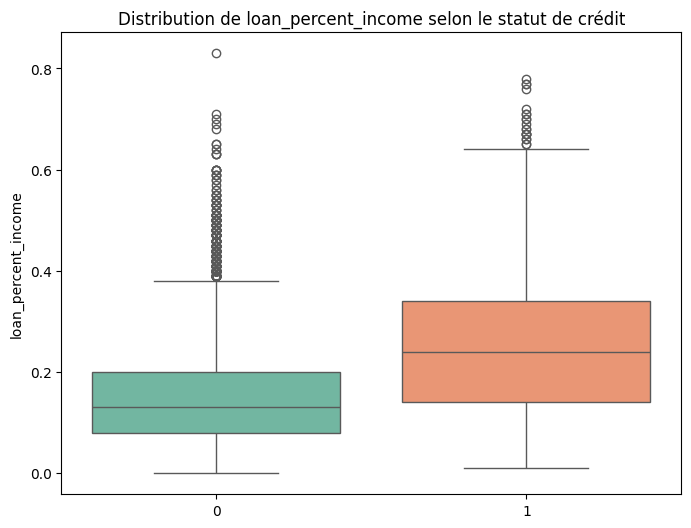

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='loan_status', y='loan_percent_income', palette='Set2')

plt.xlabel("")  
plt.ylabel("loan_percent_income")
plt.title("Distribution de loan_percent_income selon le statut de crédit")
plt.show()

In [10]:
# fonction : 
def show_relation(data, feature, title_y):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x='loan_status', y=feature, palette='Set2')
    plt.xlabel("")
    plt.ylabel(title_y)
    plt.title(f"{title_y} selon le statut de crédit")
    plt.show()

/tmp/ipykernel_2307/2706058644.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='loan_status', y=feature, palette='Set2')


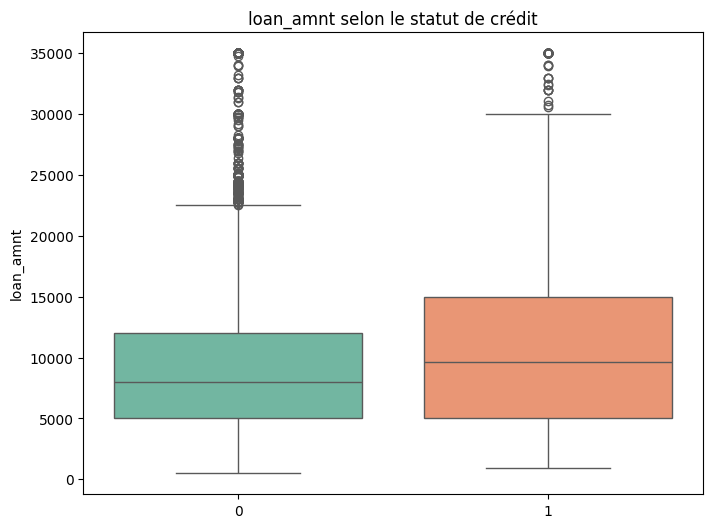

In [11]:
show_relation(df, 'loan_amnt', 'loan_amnt')

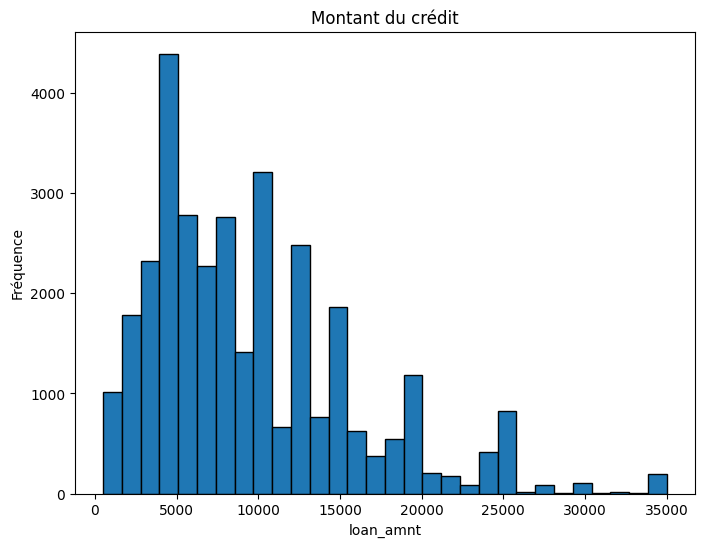

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(df['loan_amnt'], bins=30, edgecolor='black')
plt.title("Montant du crédit")
plt.xlabel("loan_amnt")
plt.ylabel("Fréquence")
plt.show()

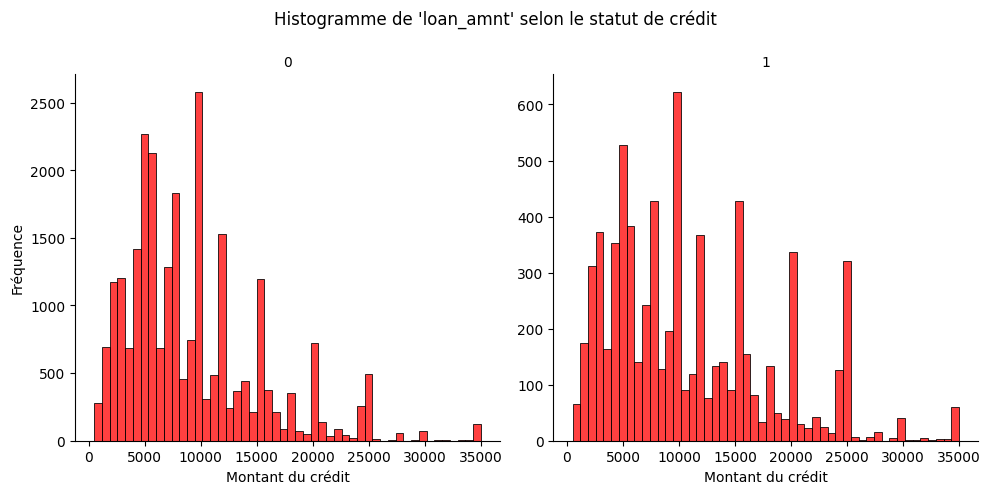

In [ ]:
# Création des facettes avec seaborn

g = sns.displot(
    data=df,
    x='loan_amnt',
    col='loan_status',
    bins=50,
    color='red',
    facet_kws={'sharey': False, 'sharex': False}
)

# Personnalisation
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Montant du crédit", "Fréquence")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Histogramme de 'loan_amnt' selon le statut de crédit")
plt.show()

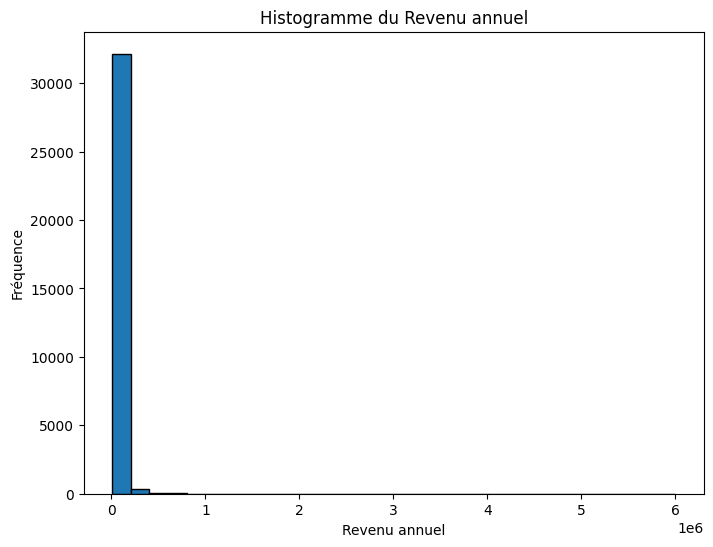

In [14]:
plt.figure(figsize=(8, 6))
plt.hist(df['person_income'], bins=30, edgecolor='black')
plt.title("Histogramme du Revenu annuel")
plt.xlabel("Revenu annuel")
plt.ylabel("Fréquence")
plt.show()

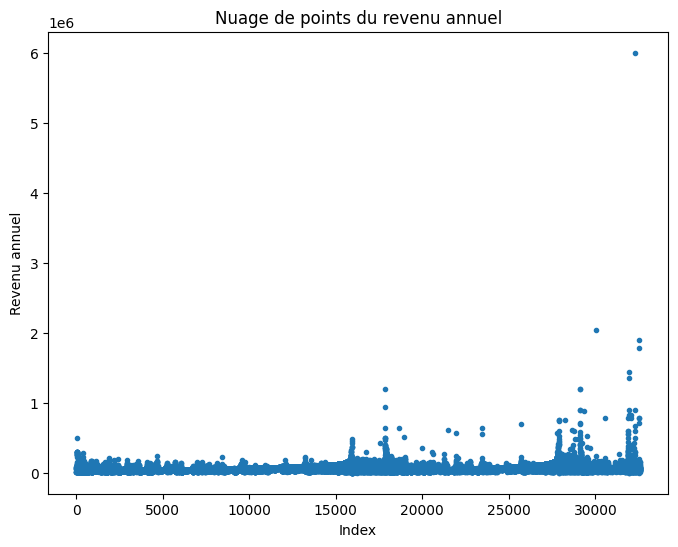

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(df['person_income'], 'o', markersize=3)  # 'o' pour les points
plt.ylabel("Revenu annuel")
plt.xlabel("Index")
plt.title("Nuage de points du revenu annuel")
plt.show()

/tmp/ipykernel_2307/2706058644.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='loan_status', y=feature, palette='Set2')


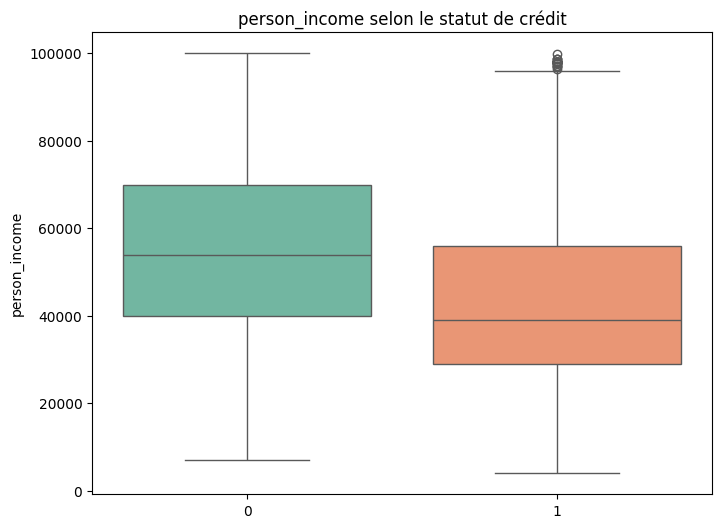

In [16]:
# Filtrage des données
filtered_df = df[df['person_income'] < 100000]

# Utilisation de la fonction show_relation
show_relation(filtered_df, 'person_income', 'person_income')


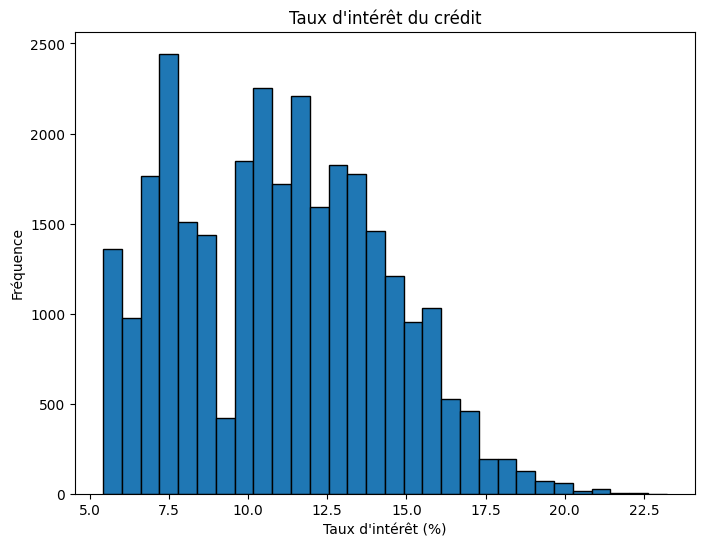

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(df['loan_int_rate'], bins=30, edgecolor='black')
plt.title("Taux d'intérêt du crédit")
plt.xlabel("Taux d'intérêt (%)")
plt.ylabel("Fréquence")
plt.show()

/tmp/ipykernel_2307/2706058644.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='loan_status', y=feature, palette='Set2')


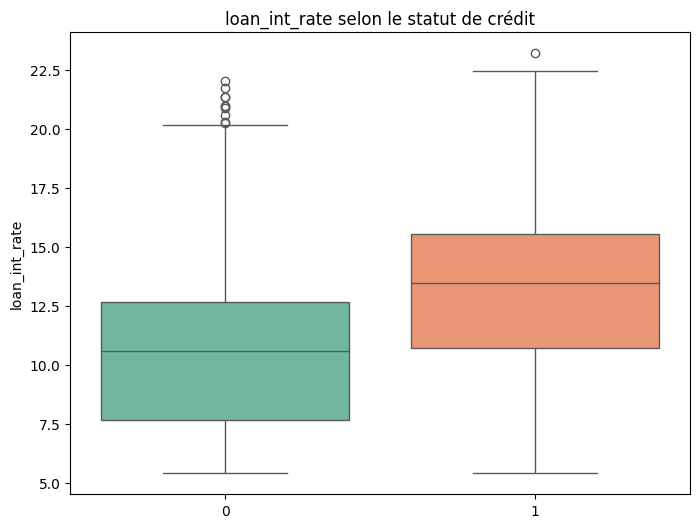

In [18]:
show_relation(df, 'loan_int_rate', 'loan_int_rate')

/tmp/ipykernel_2307/3186612072.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='person_home_ownership', palette='pastel')


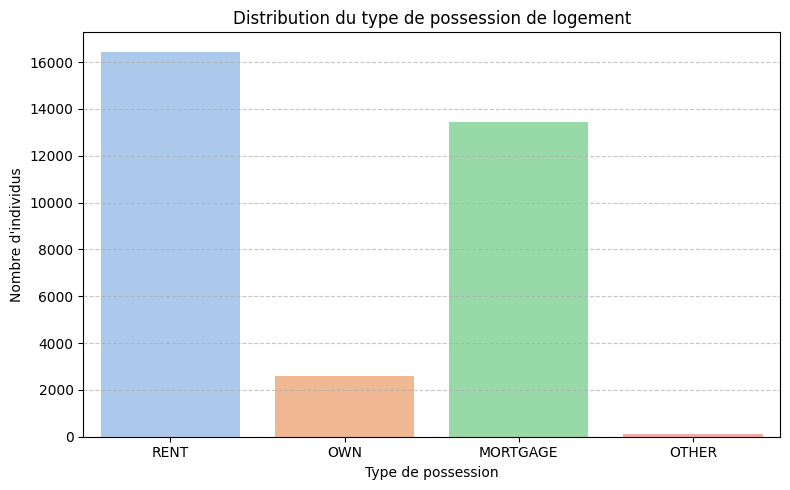

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='person_home_ownership', palette='pastel')

plt.title("Distribution du type de possession de logement")
plt.xlabel("Type de possession")
plt.ylabel("Nombre d'individus")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

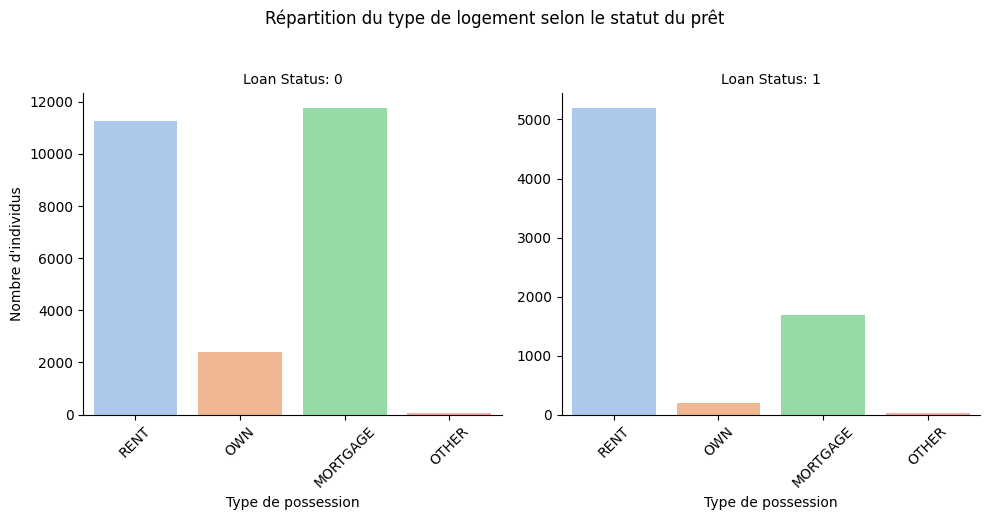

In [20]:
g = sns.catplot(
    data=df,
    x="person_home_ownership",
    kind="count",
    hue="person_home_ownership",
    col="loan_status",
    col_wrap=2,          # Comme ncol=2 dans ggplot2
    palette="pastel",
    sharey=False         # scales = "free"
)

g.set_titles("Loan Status: {col_name}")
g.set_axis_labels("Type de possession", "Nombre d'individus")
g.set_xticklabels(rotation=45)
g.fig.suptitle("Répartition du type de logement selon le statut du prêt", y=1.03)

plt.tight_layout()
plt.show()

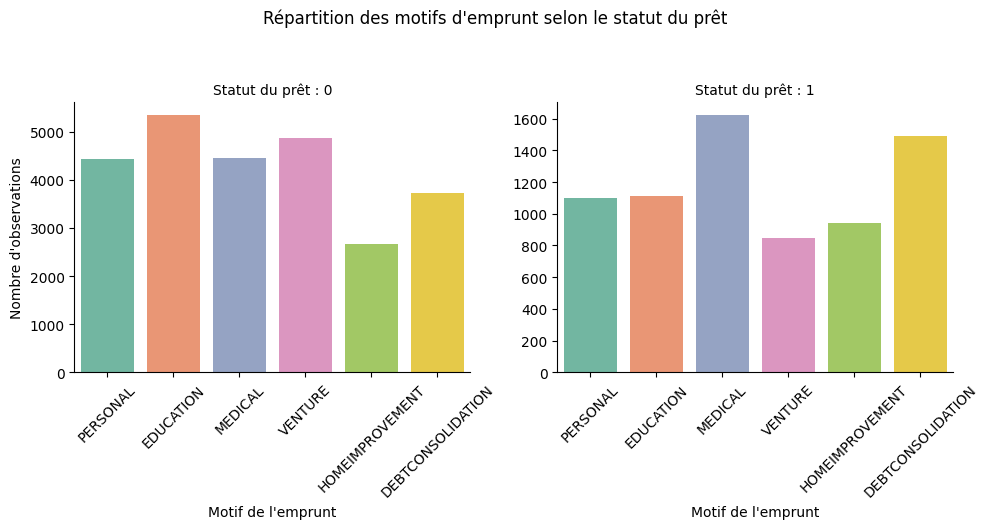

In [21]:
# Graphe facetté par statut de prêt
g = sns.catplot(
    data=df,
    x="loan_intent",
    kind="count",
    hue="loan_intent",
    col="loan_status",
    col_wrap=2,         # Deux colonnes, comme ncol=2
    palette="Set2",
    sharey=False
)

# Ajustements visuels
g.set_titles("Statut du prêt : {col_name}")
g.set_axis_labels("Motif de l'emprunt", "Nombre d'observations")
g.set_xticklabels(rotation=45)
g.fig.suptitle("Répartition des motifs d'emprunt selon le statut du prêt", y=1.05)

plt.tight_layout()
plt.show()

## Nettoyage des données

In [22]:
df_clean = df.copy()
len(df_clean)

32581


### 🔍 Détection des valeurs aberrantes (Outliers)

Au cours de l’analyse exploratoire des données, nous avons observé la présence de **valeurs aberrantes** (ou *outliers*). Ces valeurs extrêmes peuvent avoir un impact significatif sur les performances des modèles de Machine Learning, en biaisant l’apprentissage ou en influençant excessivement certains résultats. Il est donc essentiel de **les identifier puis de les traiter** de manière appropriée.

Avant toute correction, il convient de **détecter précisément ces valeurs**. Il existe pour cela plusieurs méthodes, parmi lesquelles la méthode de l’**intervalle interquartile (IQR)** est l’une des plus couramment utilisées.

Selon cette méthode, une valeur est considérée comme aberrante si elle se situe :

- **en dessous de** :  
  \[
  Q1 - 1.5 \times IQR
  \]

- **ou au-dessus de** :  
  \[
  Q3 + 1.5 \times IQR
  \]

où :
- \( Q1 \) : premier quartile (25ᵉ percentile)
- \( Q3 \) : troisième quartile (75ᵉ percentile)
- \( IQR = Q3 - Q1 \) : intervalle interquartile



In [23]:
# Calcul des bornes IQR
Q1 = df_clean['person_income'].quantile(0.25)
Q3 = df_clean['person_income'].quantile(0.75)
IQR = Q3 - Q1

# Indices des valeurs aberrantes
index_outlier_income = df_clean[
    (df_clean['person_income'] < Q1 - 1.5 * IQR) | 
    (df_clean['person_income'] > Q3 + 1.5 * IQR)
].index

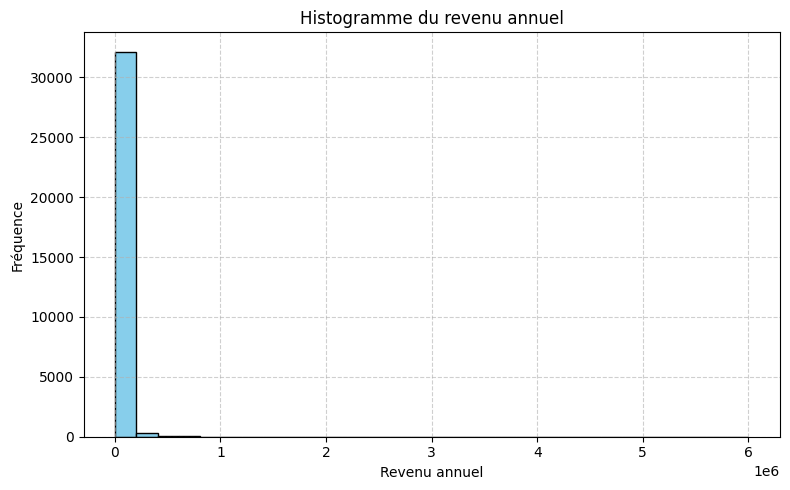

In [24]:
plt.figure(figsize=(8, 5))
plt.hist(df_clean['person_income'], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogramme du revenu annuel")
plt.xlabel("Revenu annuel")
plt.ylabel("Fréquence")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [25]:
df_clean = df_clean[df_clean['person_age'] < 100]

In [26]:
len(df_clean)

32576


### 🔧 Traitement des valeurs manquantes

Le traitement des valeurs manquantes constitue une étape essentielle dans le prétraitement des données. Deux approches principales sont généralement utilisées :

1. **La suppression des lignes** contenant des valeurs manquantes.
2. **L’imputation**, qui consiste à remplacer les valeurs manquantes par une estimation. Les méthodes d’imputation les plus simples consistent à utiliser des **statistiques descriptives** de la variable concernée, telles que la **moyenne**, la **médiane**, ou encore la **valeur la plus fréquente**.  

D’autres techniques plus avancées peuvent également être employées, comme l’**imputation par les k plus proches voisins (KNN)**, l’utilisation de **modèles prédictifs**, ou encore des **techniques de régression multiple**.

Dans la pratique, il est recommandé d’**essayer plusieurs méthodes d’imputation**, de construire et d’évaluer un modèle pour chacune, puis de **comparer leurs performances**. Cette démarche permet de choisir la méthode d’imputation la plus adaptée à la nature des données et à l’objectif de modélisation.

🔽 **Nous allons commencer ici par une imputation par la médiane**, qui est une méthode robuste en présence de valeurs extrêmes.


In [27]:
# Imputation de la variable 'person_emp_length' par la médiane
median_emp_length = df_clean['person_emp_length'].median()
df_clean['person_emp_length'].fillna(median_emp_length, inplace=True)

# Imputation de la variable 'loan_int_rate' par la médiane
median_loan_rate = df_clean['loan_int_rate'].median()
df_clean['loan_int_rate'].fillna(median_loan_rate, inplace=True)


/tmp/ipykernel_2307/1557028036.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['person_emp_length'].fillna(median_emp_length, inplace=True)
/tmp/ipykernel_2307/1557028036.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [28]:
# Vérification de la variable 'person_emp_length'
print("Résumé de person_emp_length :")
print(df_clean['person_emp_length'].describe())

# Vérification de la variable 'loan_int_rate'
print("\nRésumé de loan_int_rate :")
print(df_clean['loan_int_rate'].describe())


Résumé de person_emp_length :
count    32576.000000
mean         4.767835
std          4.087437
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: person_emp_length, dtype: float64

Résumé de loan_int_rate :
count    32576.000000
mean        11.009486
std          3.081794
min          5.420000
25%          8.490000
50%         10.990000
75%         13.110000
max         23.220000
Name: loan_int_rate, dtype: float64




### ⚙️ Préparation des données pour la modélisation  
#### 🔄 Normalisation des variables numériques

Avant d'entraîner les modèles de Machine Learning, il est indispensable de préparer les données afin d'optimiser leurs performances. L’une des étapes essentielles consiste à **normaliser les variables numériques**, c’est-à-dire à **les ramener à une échelle comparable**.

En effet, les algorithmes comme la **régression logistique**, le **k plus proches voisins (KNN)**, les **réseaux de neurones** ou les **méthodes de clustering** sont sensibles aux différences d’échelle entre les variables. Par exemple, une variable exprimée en milliers (comme le revenu) peut dominer une autre exprimée en dizaines (comme la durée d’emploi), ce qui biaise l’apprentissage.

La normalisation permet donc de :
- Centrer les données autour de **zéro** (moyenne nulle)
- Réduire les écarts autour de **1** (écart-type unitaire)
- **Améliorer la convergence** et la performance des modèles

La méthode la plus courante est la **standardisation (z-score)** :

\[
X_{\text{norm}} = \frac{X - \mu}{\sigma}
\]

où \( \mu \) est la moyenne de la variable et \( \sigma \) son écart-type.



In [29]:
df_vf = df_clean

In [30]:
#fonction de normalisation 
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())


In [31]:
# Appliquer la normalisation uniquement aux colonnes numériques

for col in df_vf.select_dtypes(include=['float64', 'int64']).columns:
    df_vf[col] = normalize(df_vf[col])

In [32]:
df_vf.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0.027027,0.027017,RENT,1.000000,PERSONAL,D,1.000000,0.595506,1,0.710843,Y,0.035714
1,0.013514,0.002751,OWN,0.040650,EDUCATION,B,0.014493,0.321348,0,0.120482,N,0.000000
2,0.067568,0.002751,MORTGAGE,0.008130,MEDICAL,C,0.144928,0.418539,1,0.686747,N,0.035714
3,0.040541,0.030209,RENT,0.032520,MEDICAL,C,1.000000,0.551124,1,0.638554,N,0.000000
4,0.054054,0.024757,RENT,0.065041,MEDICAL,C,1.000000,0.497191,1,0.662651,Y,0.071429


In [33]:
# Définir le jeu de données et la cible

X = df_vf.drop(columns='loan_status')
y = df_vf['loan_status']

# Reproducibilité
random_seed = 131

# Split 80% entraînement / 20% test avec stratification sur la variable cible
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=random_seed
)

# Fusionner les X et y pour reconstituer les jeux complets si besoin
train_set = X_train.copy()
train_set['loan_status'] = y_train

test_set = X_test.copy()
test_set['loan_status'] = y_test

# Vérification : nombre de lignes
print("Taille de train_set :", train_set.shape[0])
print("Taille de test_set  :", test_set.shape[0])

Taille de train_set : 26060
Taille de test_set  : 6516


📊 Vérification de la distribution de la variable cible

In [34]:
print("Distribution dans le train set :")
print(y_train.value_counts(normalize=True))

print("\nDistribution dans le test set :")
print(y_test.value_counts(normalize=True))


Distribution dans le train set :
loan_status
0    0.781811
1    0.218189
Name: proportion, dtype: float64

Distribution dans le test set :
loan_status
0    0.781768
1    0.218232
Name: proportion, dtype: float64


## MODELISATION

In [35]:
# 1. Encodage des variables catégorielles
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# ⚠️ S'assurer que les colonnes de train et test sont les mêmes
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# 2. Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# 3. Modèle
logreg = LogisticRegression(random_state=random_seed, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# 4. Prédictions et évaluation
y_pred = logreg.predict(X_test_scaled)

# Évaluation
print("\n=== Regression Logistique ===")
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("\nRapport de classification :\n", classification_report(y_test, y_pred))
print("Accuracy :", accuracy_score(y_test, y_pred))


=== Regression Logistique ===
Matrice de confusion :
 [[4862  232]
 [ 646  776]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      5094
           1       0.77      0.55      0.64      1422

    accuracy                           0.87      6516
   macro avg       0.83      0.75      0.78      6516
weighted avg       0.86      0.87      0.86      6516

Accuracy : 0.8652547575199508


In [36]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=random_seed)
rf.fit(X_train_encoded, y_train)

# Prédictions
y_pred_rf = rf.predict(X_test_encoded)

# Évaluation
print("\n=== Random Forest ===")
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_rf))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_rf))
print("Accuracy :", accuracy_score(y_test, y_pred_rf))


=== Random Forest ===
Matrice de confusion :
 [[5071   23]
 [ 400 1022]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      5094
           1       0.98      0.72      0.83      1422

    accuracy                           0.94      6516
   macro avg       0.95      0.86      0.89      6516
weighted avg       0.94      0.94      0.93      6516

Accuracy : 0.9350828729281768


In [37]:
# Arbre de décision
tree = DecisionTreeClassifier(random_state=random_seed)
tree.fit(X_train_encoded, y_train)

# Prédictions
y_pred_tree = tree.predict(X_test_encoded)

# Évaluation
print("=== Arbre de Décision ===")
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_tree))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_tree))
print("Accuracy :", accuracy_score(y_test, y_pred_tree))

=== Arbre de Décision ===
Matrice de confusion :
 [[4722  372]
 [ 336 1086]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      5094
           1       0.74      0.76      0.75      1422

    accuracy                           0.89      6516
   macro avg       0.84      0.85      0.84      6516
weighted avg       0.89      0.89      0.89      6516

Accuracy : 0.8913443830570903


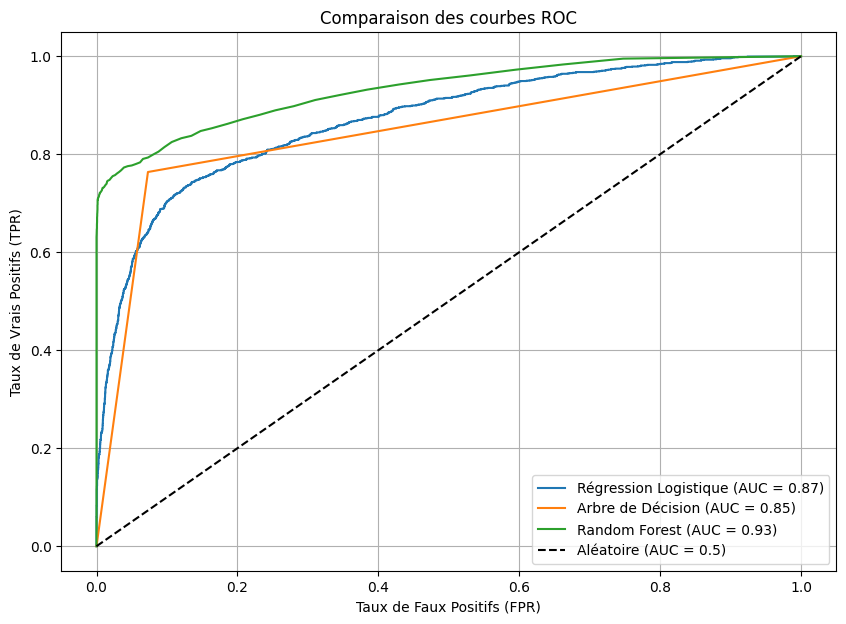

In [38]:
# Prédictions des probabilités
y_score_logreg = logreg.predict_proba(X_test_scaled)[:, 1]
y_score_tree = tree.predict_proba(X_test_encoded)[:, 1]
y_score_rf = rf.predict_proba(X_test_encoded)[:, 1]

# Courbes ROC
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_score_logreg, pos_label=logreg.classes_[1])
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_score_tree, pos_label=tree.classes_[1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf, pos_label=rf.classes_[1])

# AUC
auc_logreg = auc(fpr_logreg, tpr_logreg)
auc_tree = auc(fpr_tree, tpr_tree)
auc_rf = auc(fpr_rf, tpr_rf)

# Tracé
plt.figure(figsize=(10, 7))
plt.plot(fpr_logreg, tpr_logreg, label=f"Régression Logistique (AUC = {auc_logreg:.2f})")
plt.plot(fpr_tree, tpr_tree, label=f"Arbre de Décision (AUC = {auc_tree:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Aléatoire (AUC = 0.5)')

plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Comparaison des courbes ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## ✅ Prédictions + Scores de la Régression Logistique

In [39]:
# Obtenir les probabilités de chaque classe
y_proba_logreg = logreg.predict_proba(X_test_scaled)

# Probabilité d'appartenance à la classe positive (par ex. "Charged Off")
# Attention : vérifier l'ordre des classes avec logreg.classes_
print("Classes :", logreg.classes_)
y_scores_logreg = y_proba_logreg[:, 1]  # colonne 1 = classe positive

# Affichage des premiers scores
import pandas as pd
score_df = pd.DataFrame({
    'Vrai label': y_test.values,
    'Score (classe positive)': y_scores_logreg
})

print(score_df.head(10))

Classes : [0 1]
  Vrai label  Score (classe positive)
0          0                 0.048227
1          1                 0.982907
2          0                 0.062100
3          0                 0.003943
4          0                 0.005165
5          0                 0.287700
6          0                 0.109675
7          0                 0.138064
8          0                 0.065805
9          1                 0.907195


In [40]:
# 1. Séparer les features
X_full = df_vf.drop(columns='loan_status')

# 2. Encodage des variables catégorielles
X_full_encoded = pd.get_dummies(X_full)

# ⚠️ Aligner les colonnes avec l'entraînement (pour gérer les catégories absentes/nouvelles)
X_full_encoded, _ = X_full_encoded.align(X_train_encoded, join='right', axis=1, fill_value=0)

# 3. Standardisation
X_full_scaled = scaler.transform(X_full_encoded)

# 4. Prédire les scores de la classe "risque"
y_full_scores = logreg.predict_proba(X_full_scaled)[:, 1]  # probabilité de la classe "positive"

# 5. Ajouter les scores au dataframe d'origine
df_vf['score_risque'] = y_full_scores

# Aperçu
print(df_vf[['loan_status', 'score_risque']].head())


  loan_status  score_risque
0           1      0.892619
1           0      0.009280
2           1      0.979783
3           1      0.770410
4           1      0.796855


In [41]:
df_vf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32576 entries, 0 to 32580
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  32576 non-null  float64 
 1   person_income               32576 non-null  float64 
 2   person_home_ownership       32576 non-null  object  
 3   person_emp_length           32576 non-null  float64 
 4   loan_intent                 32576 non-null  object  
 5   loan_grade                  32576 non-null  object  
 6   loan_amnt                   32576 non-null  float64 
 7   loan_int_rate               32576 non-null  float64 
 8   loan_status                 32576 non-null  category
 9   loan_percent_income         32576 non-null  float64 
 10  cb_person_default_on_file   32576 non-null  object  
 11  cb_person_cred_hist_length  32576 non-null  float64 
 12  score_risque                32576 non-null  float64 
dtypes: category(1), float

In [42]:
df_vf.sample(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,score_risque
27828,0.148649,0.120838,MORTGAGE,0.113821,PERSONAL,D,0.333333,0.487079,0,0.060241,Y,0.142857,0.137132
20230,0.189189,0.017487,MORTGAGE,0.113821,VENTURE,A,0.159420,0.032022,0,0.180723,N,0.107143,0.022349
6163,0.040541,0.009824,RENT,0.000000,DEBTCONSOLIDATION,B,0.159420,0.312921,0,0.301205,N,0.000000,0.554188


## création de classes de risque

In [43]:
# Définir des seuils arbitraires ou par quantiles
#df_vf['classe_risque'] = pd.qcut(df_vf['score_risque'], q=3, labels=['Faible', 'Moyen', 'Élevé'])

# Ou avec des seuils fixes 
df_vf['classe_risque'] = pd.cut(df_vf['score_risque'], bins=[0, 0.3, 0.7, 1], labels=['Faible', 'Moyen', 'Élevé'])

# Vérification
print(df_vf[['loan_status', 'score_risque', 'classe_risque']].head(10))


  loan_status  score_risque classe_risque
0           1      0.892619         Élevé
1           0      0.009280        Faible
2           1      0.979783         Élevé
3           1      0.770410         Élevé
4           1      0.796855         Élevé
5           1      0.028976        Faible
6           1      0.269772        Faible
7           1      0.388941         Moyen
8           1      0.172268        Faible
9           1      0.155783        Faible


In [44]:
df_vf.sample(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,score_risque,classe_risque
16785,0.081081,0.014000,MORTGAGE,0.065041,DEBTCONSOLIDATION,C,0.072464,0.438202,0,0.108434,Y,0.035714,0.104950,Faible
21137,0.094595,0.030573,RENT,0.056911,VENTURE,A,0.130435,0.020787,0,0.096386,N,0.142857,0.026264,Faible
23849,0.148649,0.030455,MORTGAGE,0.121951,PERSONAL,A,0.275362,0.312921,0,0.180723,N,0.107143,0.032662,Faible
1483,0.067568,0.019255,RENT,0.032520,VENTURE,B,0.020290,0.252247,0,0.036145,N,0.071429,0.031941,Faible
16054,0.054054,0.047156,MORTGAGE,0.000000,MEDICAL,C,0.275362,0.418539,0,0.120482,Y,0.071429,0.063371,Faible
3216,0.067568,0.024602,RENT,0.040650,HOMEIMPROVEMENT,B,0.086957,0.215169,0,0.072289,N,0.000000,0.109153,Faible
16580,0.040541,0.028244,MORTGAGE,0.040650,MEDICAL,B,0.130435,0.333708,0,0.096386,N,0.035714,0.051821,Faible
30775,0.229730,0.019992,RENT,0.000000,DEBTCONSOLIDATION,A,0.246377,0.178090,0,0.240964,N,0.500000,0.241347,Faible
15689,0.013514,0.006877,OWN,0.040650,HOMEIMPROVEMENT,A,0.173913,0.111236,1,0.433735,N,0.035714,0.216748,Faible
29863,0.243243,0.018666,RENT,0.016260,MEDICAL,A,0.115942,0.067416,0,0.132530,N,0.321429,0.100887,Faible


In [45]:
# Regrouper par classe de risque et calculer les min / max
min_max_scores = df_vf.groupby('classe_risque')['score_risque'].agg(['min', 'max']).sort_index()

print(min_max_scores)

                    min       max
classe_risque                    
Faible         0.000343  0.299972
Moyen          0.300009  0.699843
Élevé          0.700120  0.999715


/tmp/ipykernel_2307/1635281733.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  min_max_scores = df_vf.groupby('classe_risque')['score_risque'].agg(['min', 'max']).sort_index()


In [46]:

# Calcul du nombre de défauts et du total par classe
df_vf['loan_status'] = df_vf['loan_status'].astype(int)
grouped = df_vf.groupby('classe_risque')

# Total et défauts
effectifs = grouped.size()
nb_defauts = grouped['loan_status'].sum()

# Calcul du CHR comme fréquence
chr_freq = (nb_defauts / effectifs * 100).to_frame(name='CHR')
chr_freq['Nombre'] = effectifs
chr_freq['Nombre_defaut'] = nb_defauts

# Affichage final
chr_freq = chr_freq[['CHR', 'Nombre', 'Nombre_defaut']].sort_index()
print(chr_freq)


                     CHR  Nombre  Nombre_defaut
classe_risque                                  
Faible          8.087964   24419           1975
Moyen          50.368411    5293           2666
Élevé          86.138268    2864           2467


/tmp/ipykernel_2307/2028871190.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_vf.groupby('classe_risque')


## Calcul de EL, UL et de la Var_loss

In [47]:
# Si tu n'as pas encore les colonnes, en voici des exemples fictifs :
# (à adapter avec tes propres valeurs ou modèles)
df_vf['pd'] = df_vf['score_risque']  # ou un modèle de PD déjà calibré
df_vf['lgd'] = 0.3                   # exemple fixe : 60% de perte
df_vf['ead'] = df['loan_amnt']    # montant exposé (ex. montant du prêt)

# 1. Expected Loss
df_vf['el'] = df_vf['pd'] * df_vf['lgd'] * df_vf['ead']

# 2. Expected Credit Loss (identique si court terme ou si pas pondéré)
df_vf['ecl'] = df_vf['el']

df_vf['ul'] = (df_vf['pd'] * (1 - df_vf['pd']) * (df_vf['lgd'] * df_vf['ead'])**2) ** 0.5


# 3. Variance des pertes
df_vf['var_loss'] = df_vf['pd'] * (1 - df_vf['pd']) * (df_vf['lgd'] * df_vf['ead'])**2

# Résumé global
total_el = df_vf['el'].sum()
total_UL = df_vf['ul'].sum()
total_var = df_vf['var_loss'].sum()

print(f"Expected Loss total : {total_el:,.2f} €")
print(f"enexpected Loss total : {total_UL:,.2f} €")
print(f"Variance totale des pertes : {total_var:,.2f} €")


Expected Loss total : 23,198,962.53 €
enexpected Loss total : 28,547,872.33 €
Variance totale des pertes : 43,233,081,639.93 €


## Gestion des désiquilibre des classes : 

⚖️ Résolution du déséquilibre de classe
Le déséquilibre entre les classes est un phénomène courant, notamment dans les problématiques de scoring de crédit, où les cas de défaut de paiement sont naturellement moins fréquents que les cas de non-défaut. Ce déséquilibre peut nuire à la performance des modèles de classification, qui auront tendance à favoriser la classe majoritaire.
Parmi les différentes approches pour corriger ce déséquilibre, le rééchantillonnage est l’une des techniques les plus couramment utilisées. On distingue principalement trois méthodes :


🔹 1. Sous-échantillonnage de la classe majoritaire (Random Under Sampling - RUS)
Cette méthode consiste à réduire la taille de la classe majoritaire (généralement les non-défauts) en sélectionnant aléatoirement un sous-ensemble d’observations, de manière à équilibrer le nombre d'exemples entre les deux classes.
✅ Avantage : rapide à mettre en œuvre
⚠️ Inconvénient : perte d’information significative, car de nombreuses données utiles sont supprimées


🔹 2. Sur-échantillonnage de la classe minoritaire (Random Over Sampling - ROS)
Ici, on duplique aléatoirement les observations de la classe minoritaire (les défauts de paiement) jusqu'à atteindre une répartition équilibrée avec la classe majoritaire.
✅ Avantage : aucune perte d'information
⚠️ Inconvénient : création de doublons → risque de sur-apprentissage (overfitting)


🔹 3. SMOTE – Synthetic Minority Oversampling Technique
SMOTE est une méthode avancée qui permet de générer de nouvelles observations synthétiques pour la classe minoritaire. Plutôt que de dupliquer des cas existants, SMOTE crée de nouveaux exemples en combinant les caractéristiques des plus proches voisins des cas de défaut.
✅ Avantage : enrichit la diversité des exemples minoritaires
⚠️ Inconvénient : risque d’introduire du bruit ou des erreurs si les voisins utilisés ne sont pas représentatifs de la même classe


🧠 Remarque importante :
Les méthodes de rééchantillonnage doivent strictement être appliquées uniquement sur les données d’entraînement, jamais sur l’ensemble de test. L’ensemble de test doit rester représentatif de la réalité pour évaluer la performance du modèle en conditions réelles.